In [1]:
import os

In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
from matplotlib import pyplot as plt

In [18]:
from skimage.metrics import structural_similarity as ssim

In [19]:
from skimage.metrics import peak_signal_noise_ratio as psnr

In [45]:
import pandas as pd

<hr>


**Task:**  
## (1) Write a Python program to detect all objects in an image named **`nuts_bolts.jpg`** using thresholding and contour detection. The program should:

- Detect and count all objects in the image  
- Compute summary statistics of the detected object areas:  
  - Mean area  
  - Median area  
  - Largest object area  
  - Smallest object area  
- Print the analysis clearly

<hr>

In [21]:
img = cv2.imread('nuts_bolts.jpg')

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

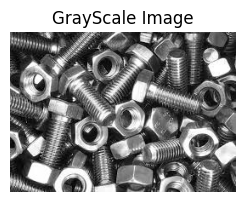

In [23]:
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.title('GrayScale Image')
plt.axis('off')
plt.show()

In [24]:
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

In [25]:
_ , binary

(120.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], shape=(189, 266), dtype=uint8))

In [26]:
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
areas = [cv2.contourArea(c) for c in contours]

In [28]:
print("Total objects:", len(areas))
print("Mean area:", np.mean(areas))
print("Median area:", np.median(areas))
print("Largest area:", np.max(areas))
print("Smallest area:", np.min(areas))

Total objects: 32
Mean area: 1417.6875
Median area: 0.0
Largest area: 44819.5
Smallest area: 0.0


<hr>


**Task:**  
## 2. Load "shapes2.png", detect all contours, classify each object as triangle, square/rectangle,or circle, and create a table (using a list of dictionaries or pandas DataFrame) summarizing:​

- object ID​

- shape​

- area​

- perimeter​

- Display the DataFrame.​

<hr>

In [30]:
img = cv2.imread('shapes2.png')

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

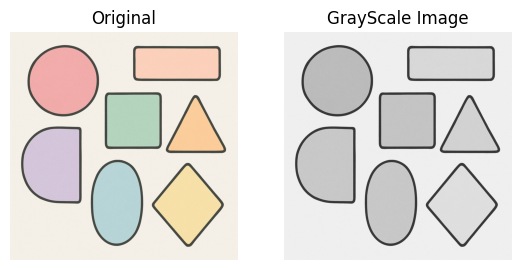

In [41]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('GrayScale Image')
plt.axis('off')

plt.show()

In [42]:
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

In [43]:
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [52]:
rows = []

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04*peri, True)
    sides = len(approx)

    if sides == 3:
        shape = "Triangle"
    elif sides == 4:
        shape = "Square/Rectangle"
    else:
        shape = "Circle"

    rows.append({"ID": i+1, "Shape": shape, "Area": area, "Perimeter": peri})


In [54]:
df = pd.DataFrame(rows)
df


ID             Shape       Area  Perimeter
0   1  Square/Rectangle  1046529.0     4092.0

In [28]:
import cv2
import numpy as np
import pandas as pd

# --- Load image ---
img = cv2.imread("shapes2.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY_INV)



In [29]:
# --- Find contours ---
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

shape_info = []
object_id = 1

for cnt in contours:
    # Calculate perimeter & approximation
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
    
    area = cv2.contourArea(cnt)
    vertices = len(approx)

    # --- Shape classification based on vertices ---
    if vertices == 3:
        shape = "Triangle"
    elif vertices == 4:
        # Distinguish square vs rectangle using aspect ratio
        x, y, w, h = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "Square" if 0.95 < ar < 1.05 else "Rectangle"
    else:
        shape = "Circle"  # Good approximation for many-sided shapes
    
    # Store results
    shape_info.append({
        "Object ID": object_id,
        "Shape": shape,
        "Area": area,
        "Perimeter": peri
    })
    
    object_id += 1

In [25]:
df = pd.DataFrame(shape_info)
df

Object ID      Shape     Area    Perimeter
0          1  Rectangle  65820.0  1035.498685
1          2     Circle  72936.5  1053.477262
2          3     Circle  81148.0  1107.813271
3          4   Triangle  39418.0   894.322936
4          5     Square  63785.5   995.923880
5          6  Rectangle  60594.5  1072.610172
6          7     Circle  80108.5  1057.158505


**Task:**  
## 3. Read an image "metal_parts.png".​Detect all parts using contour detection.​Then identify defective parts where:

- the convexity defect count is > 5 OR​

- area is below a threshold​

- Calculate and print:​

- total parts​

- defective parts​

- defect percentage​

In [51]:
img = cv2.imread("metal_parts.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,binary = cv2.threshold(gray,180,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray,cmap = 'gray')
plt.title("Gray Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(binary,cmap = 'gray')
plt.title("Binary Image")
plt.axis("off")

plt.show()


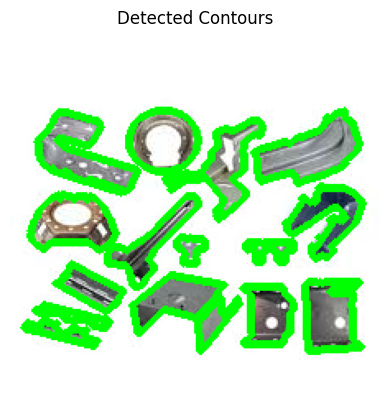

In [52]:
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()

cv2.drawContours(contour_img,contours,-1,(0,255,0),3)

plt.imshow(contour_img)
plt.title("Detected Contours")
plt.axis('off')
plt.show()

In [53]:
defective_count = 0
area_threshold = 1500   

for cnt in contours:

    # --- Compute area ---
    area = cv2.contourArea(cnt)

    # --- Compute convex hull for drawing (points) ---
    hull_points = cv2.convexHull(cnt) # Returns coordinates of the hull boundary

    # --- Compute convex hull for defects (indices) ---
    hull_indices = cv2.convexHull(cnt, returnPoints=False) # Returns indices of contour points

    defect_count = 0
    if hull_indices is not None and len(hull_indices) > 3:
        try:
            defects = cv2.convexityDefects(cnt, hull_indices)
            if defects is not None:
                defect_count = defects.shape[0]
        except:
            defect_count = 0   # if error → treat as no defects

    # --- 4. Mark defective ---
    if defect_count > 5 or area < area_threshold:
        defective_count += 1


In [54]:
total_parts = len(contours)
defect_percentage = (defective_count / total_parts) * 100

print("Total parts:", total_parts)
print("Defective parts:", defective_count)
print("Defect percentage: {:.2f}%".format(defect_percentage))


Total parts: 21
Defective parts: 21
Defect percentage: 100.00%


<hr>

# 4. Load "coins.jpg", segment each coin, compute each coin’s radius using enclosing circles. Assume radius ranges represent denominations:

* small = ₹1
* medium = ₹2
* large = ₹5

* Calculate the total monetary value of coins in the image.

In [67]:
img = cv2.imread("coins.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Otsu automatically chooses the best threshold value instead of you guessing one. Best for images having uneven lighting
# Otsu returns obj as black and background as white. Combining with INV we get obj as white and background as white
_,binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) 

plt.figure(figsize = (10,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.axis("Off")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(gray,cmap = 'gray')
plt.axis("off")
plt.title("Gray")

plt.subplot(1,3,3)
plt.imshow(binary,cmap = 'gray')
plt.axis("Off")
plt.title("Segmented Image")

plt.show()

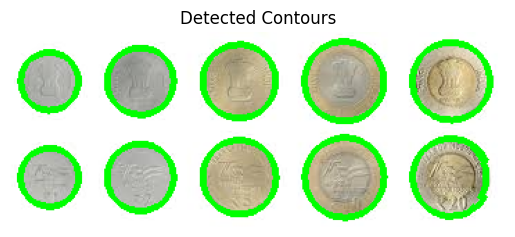

In [68]:
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()

cv2.drawContours(contour_img,contours,-1,(0,255,0),3)

plt.imshow(contour_img)
plt.title("Detected Contours")
plt.axis('off')
plt.show()


In [69]:
circles = []
radii = []
for i,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True) # True - Closed Shape

    if perimeter == 0:
        continue

    # Checking if the given image contour leads to circle
    circularity = 4 * np.pi * area / (perimeter * perimeter)

    if circularity > 0.75:
        r = perimeter / (2*np.pi)
        radii.append(round(r))
        circles.append(perimeter)

In [70]:
print(radii)

[22, 25, 28, 31, 22, 25, 28, 30, 30]


In [71]:
# Radii value computed manually
total = 0
for r in radii:
    if r <= 150:
        total += 1    # Rs1
    elif r>150 and r<=180:
        total += 2    # Rs2
    else:
        total += 5    # Rs5

In [72]:
print(total)

9


<hr>

# 5. Detect all objects in "items.png", extract bounding box coordinates, and then generate a scatter-like plot of object centroids (x,y). Perform a simple analysis:

* Which quadrant has the most objects?​

* Are objects clustered or spread uniformly?​

In [76]:
img = cv2.imread("items.png")
img

array([[[254, 250, 249],
        [255, 255, 254],
        [255, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 245, 245],
        [255, 253, 253],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 250, 252],
        [255, 254, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

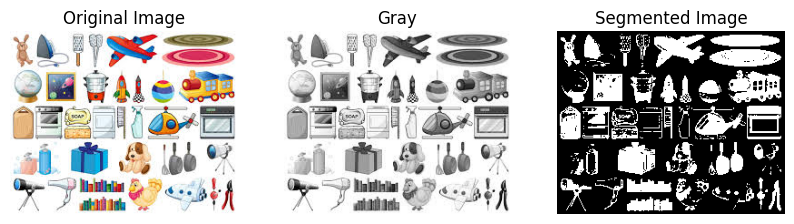

In [77]:

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize = (10,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.axis("Off")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(gray,cmap = 'gray')
plt.axis("off")
plt.title("Gray")

plt.subplot(1,3,3)
plt.imshow(binary,cmap = 'gray')
plt.axis("Off")
plt.title("Segmented Image")

plt.show()

In [78]:
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()

cv2.drawContours(contour_img,contours,-1,(0,255,0),3)

plt.imshow(contour_img)
plt.title("Detected Contours")
plt.axis('off')
plt.show()

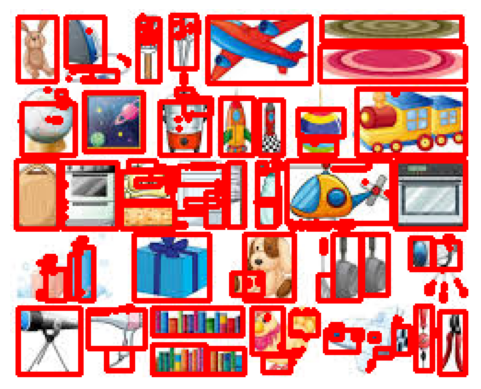

In [79]:
output = img.copy()
count = 0
x_centroid = []
y_centroid = []
for cnt in contours:
    count+=1
    x,y,w,h = cv2.boundingRect(cnt)

    # This works because x, y are the top-left corner of the rectangle, and w, h are the width and height. Adding half of the width/height gives the center.
    cx = x + w / 2
    cy = y + h / 2

    x_centroid.append(cx)
    y_centroid.append(cy)
    
    cv2.rectangle(output,(x,y),(x+w,y+h),(255,0,0),2) # cv2.rectangle(image, start_point, end_point, color, thickness)
plt.imshow(output)
plt.axis('off')
plt.show()

In [80]:
print(len(y_centroid))

199


In [81]:
h, w = img.shape[:2]

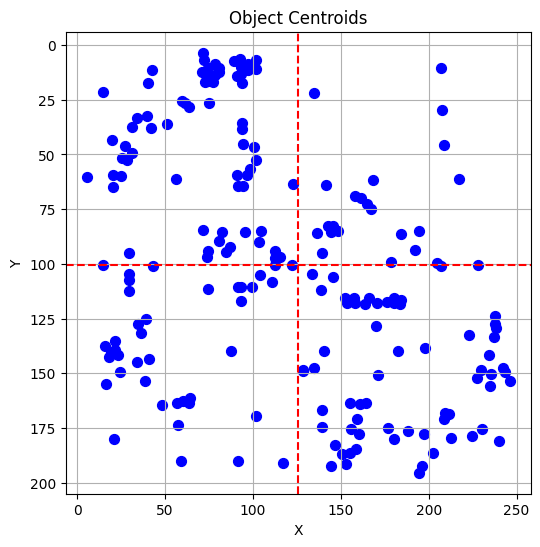

In [82]:
plt.figure(figsize=(6,6))  # 6 inches × 6 inches
plt.scatter(x_centroid, y_centroid, color='blue', s=50)  # s = size of points

plt.axvline(x=w/2, color='red', linestyle='--')  # vertical line
plt.axhline(y=h/2, color='red', linestyle='--')  # horizontal line

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Object Centroids')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

In [83]:
h, w = img.shape[:2]

# Quadrant counters
q1 = 0  # top-left
q2 = 0  # top-right
q3 = 0  # bottom-left
q4 = 0  # bottom-right

for cx, cy in zip(x_centroid, y_centroid):
    if cx < w/2 and cy < h/2:
        q1 += 1
    elif cx >= w/2 and cy < h/2:
        q2 += 1
    elif cx < w/2 and cy >= h/2:
        q3 += 1
    else:
        q4 += 1

print("Top-left quadrant:", q1)
print("Top-right quadrant:", q2)
print("Bottom-left quadrant:", q3)
print("Bottom-right quadrant:", q4)


Top-left quadrant: 71
Top-right quadrant: 22
Bottom-left quadrant: 40
Bottom-right quadrant: 66


In [84]:
# Convert centroids into points. zip combines into (x1, y1), (x2, y2), (x3, y3) ...
points = np.array(list(zip(x_centroid, y_centroid)))

# Compute pairwise distances
distances = []

for i in range(len(points)):
    for j in range(i+1, len(points)):
        
        # This is the Euclidean distance formula:
        d = np.linalg.norm(points[i] - points[j])
        distances.append(d)

# Average distance summarizes overall spacing
avg_distance = np.mean(distances)
print("Average distance between objects:", avg_distance)

Average distance between objects: 109.54572580172508


In [86]:
# This is the maximum possible distance in the image (top-left to bottom-right).We need this so our distance comparison is scale-independent.
image_diag = np.sqrt(w**2 + h**2)

# It’s a simple threshold, If objects are on average closer than ~50% of image size → clustered otherwise uniformly spread
if avg_distance < image_diag / 2:
    print("Objects are --> CLUSTERED")
else:
    print("Objects are --> UNIFORMLY SPREAD")


Objects are --> CLUSTERED


<hr>

# 6. Extract contour areas from "geometric_objects.jpg". Plot a histogram of all contour areas using Matplotlib. Interpret:

* Do objects have similar sizes?
* Are there outliers?
* Write a short comment.

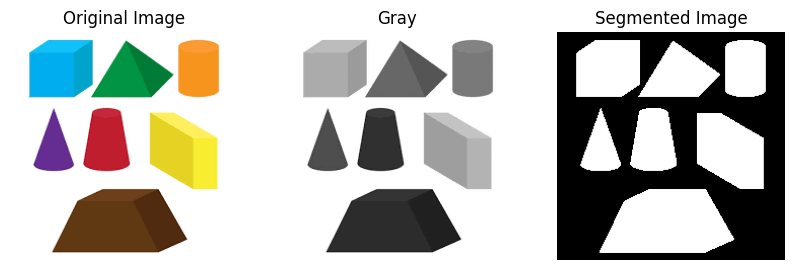

In [88]:
img = cv2.imread("geometric_objects.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,binary = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.axis("Off")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(gray,cmap = 'gray')
plt.axis("off")
plt.title("Gray")

plt.subplot(1,3,3)
plt.imshow(binary,cmap = 'gray')
plt.axis("Off")
plt.title("Segmented Image")

plt.show()

In [89]:
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()

cv2.drawContours(contour_img,contours,-1,(0,255,0),3)

plt.imshow(contour_img)
plt.title("Detected Contours")
plt.axis('off')
plt.show()

In [90]:
area = []
for i,cnt in enumerate(contours):
    value = cv2.contourArea(cnt)
    area.append(value)
    print(value)

6310.5
3772.5
2168.5
1262.5
2457.5
2052.0
3187.5


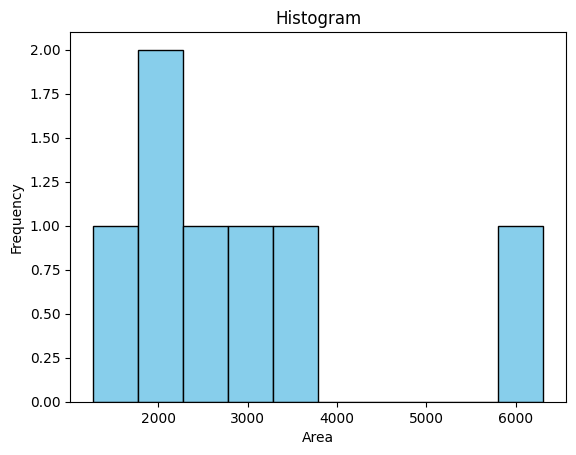

In [91]:
plt.hist(area,color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the plot
plt.show()

<hr>

# 7. Using "crops.jpg", apply:

* global thresholding

* adaptive thresholding

* For each method, count detected objects and calculate:

* mean object area

* number of missed objects

* Print a comparison table.

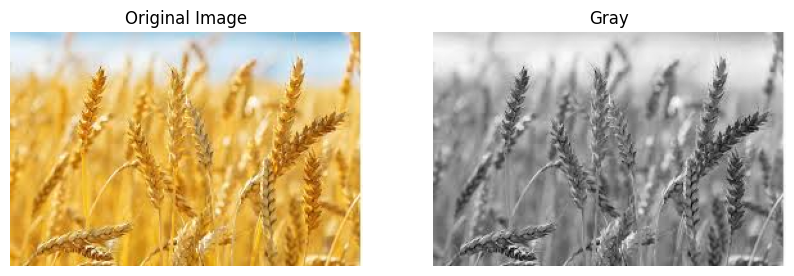

In [92]:
img = cv2.imread("crops.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("Off")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(gray,cmap = 'gray')
plt.axis("off")
plt.title("Gray")

plt.show()

## Global Thresholding

In [93]:
global_thresh = {}

T = 120
_,binary = cv2.threshold(gray,T,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary,cmap = 'gray')
plt.title("Global Thresholding")
plt.axis('off')
plt.show()

In [94]:
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()

cv2.drawContours(contour_img,contours,-1,(0,255,0),3)

plt.imshow(contour_img)
plt.title("Detected Contours")
plt.axis('off')
plt.show()

In [95]:
num_detected = len(contours)
print("Detected objects:", num_detected)
global_thresh['Detected Object (Before Erosion)'] = num_detected

Detected objects: 229


In [96]:
areas = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    areas.append(area)


mean_area = sum(areas) / len(areas) if areas else 0
print("Mean object area:", mean_area)
global_thresh['Mean Area (Before Erosion)'] = mean_area


Mean object area: 25.148471615720524


In [97]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
eroded = cv2.erode(binary, kernel, iterations=1)

plt.imshow(eroded, cmap='gray')
plt.title("After Erosion")
plt.axis('off')
plt.show()

In [98]:
contours,hierarchy = cv2.findContours(eroded,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()

cv2.drawContours(contour_img,contours,-1,(0,255,0),3)

plt.imshow(contour_img)
plt.title("Detected Contours")
plt.axis('off')
plt.show()

In [99]:
num_detected = len(contours)
print("Detected objects:", num_detected)
global_thresh['Detected Object (After Erosion)'] = num_detected

Detected objects: 165


In [101]:
areas = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    areas.append(area)
mean_area = sum(areas) / len(areas) if areas else 0
print("Mean object area:", mean_area)
global_thresh['Mean Area (After Erosion)'] = mean_area

print(global_thresh)

Mean object area: 12.63030303030303
{'Detected Object (Before Erosion)': 229, 'Mean Area (Before Erosion)': 25.148471615720524, 'Detected Object (After Erosion)': 165, 'Mean Area (After Erosion)': 12.63030303030303}


## Adaptive Thresholding

In [102]:
adap_thresh = {}

# It converts a grayscale image into a binary image by computing a local threshold for each pixel based on the mean intensity of its neighborhood.
binary_adaptive = cv2.adaptiveThreshold(
    gray,
    255, # Maximum value assigned to pixels that satisfy the threshold condition
    cv2.ADAPTIVE_THRESH_MEAN_C, # Method used to calculate the local threshold
    cv2.THRESH_BINARY_INV, # Thresholding type
    11, # Size of the local neighborhood
    2 # A constant subtracted from the local mean
)

plt.imshow(binary_adaptive, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.show()


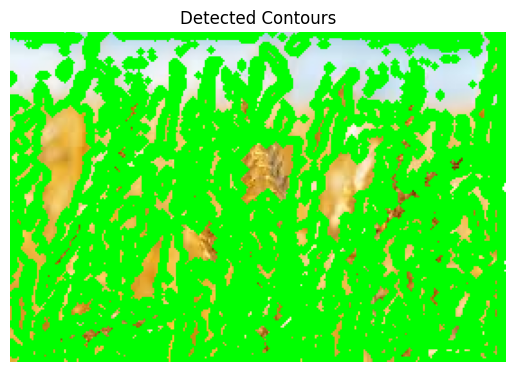

In [103]:
contours,hierarchy = cv2.findContours(binary_adaptive,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()

cv2.drawContours(contour_img,contours,-1,(0,255,0),3)

plt.imshow(contour_img)
plt.title("Detected Contours")
plt.axis('off')
plt.show()

In [104]:
num_detected = len(contours)
print("Detected objects:", num_detected)
adap_thresh['Detected Object (Before Erosion)'] = num_detected

Detected objects: 247


In [105]:
areas = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    areas.append(area)
mean_area = sum(areas) / len(areas) if areas else 0
print("Mean object area:", mean_area)
adap_thresh['Mean Area (Before Erosion)'] = mean_area

Mean object area: 74.6255060728745


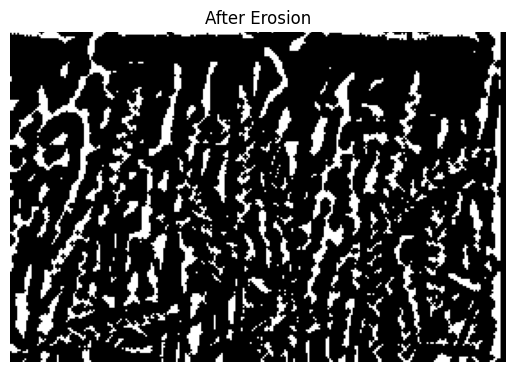

In [106]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
eroded = cv2.erode(binary_adaptive, kernel, iterations=1)

plt.imshow(eroded, cmap='gray')
plt.title("After Erosion")
plt.axis('off')
plt.show()

In [107]:
contours,hierarchy = cv2.findContours(eroded,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()

cv2.drawContours(contour_img,contours,-1,(0,255,0),3)

plt.imshow(contour_img)
plt.title("Detected Contours")
plt.axis('off')
plt.show()

In [108]:
num_detected = len(contours)
print("Detected objects:", num_detected)
adap_thresh['Detected Object (After Erosion)'] = num_detected

Detected objects: 338


In [109]:
areas = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    areas.append(area)
mean_area = sum(areas) / len(areas) if areas else 0
print("Mean object area:", mean_area)
adap_thresh['Mean Area (After Erosion)'] = mean_area

Mean object area: 16.69526627218935


In [112]:
print('Before Erosion: ',adap_thresh)

Before Erosion:  {'Detected Object (Before Erosion)': 247, 'Mean Area (Before Erosion)': 74.6255060728745, 'Detected Object (After Erosion)': 338, 'Mean Area (After Erosion)': 16.69526627218935}


In [113]:
import pandas as pd
df = pd.DataFrame([global_thresh,adap_thresh],index = ['Global Thresh','Adap Thresh'])
df

Detected Object (Before Erosion)  Mean Area (Before Erosion)  \
Global Thresh                               229                   25.148472   
Adap Thresh                                 247                   74.625506   

               Detected Object (After Erosion)  Mean Area (After Erosion)  
Global Thresh                              165                  12.630303  
Adap Thresh                                338                  16.695266

<hr>

# 8. Add Gaussian noise to "packets.jpg", then detect contours before and after applying median filtering. 

#### Calculate:
* difference in number of contours​
* change in average area​
* percentage improvement in detection accuracy​

In [114]:
img = cv2.imread("packets.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("Off")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(gray,cmap = 'gray')
plt.axis("off")
plt.title("Gray")

plt.show()

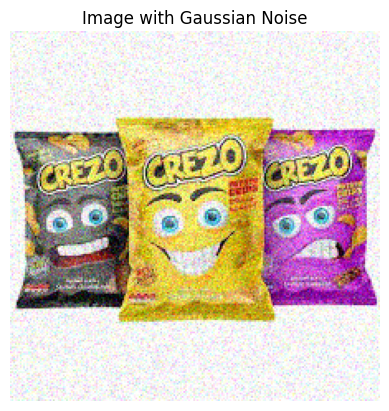

In [115]:
noise = np.random.normal(0, 25, img.shape).astype(np.float32)
gaussian_img = cv2.add(img.astype(np.float32), noise)
gaussian_img = np.clip(gaussian_img, 0, 255).astype(np.uint8)

plt.imshow(gaussian_img)
plt.title("Image with Gaussian Noise")
plt.axis("off")
plt.show()

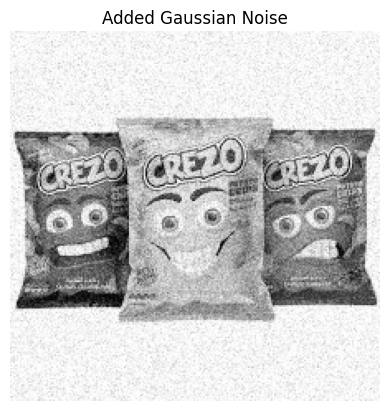

In [119]:
gray_noisy = cv2.cvtColor(gaussian_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_noisy,cmap = 'gray')
plt.title("Added Gaussian Noise")
plt.axis('off')
plt.show()

In [120]:
binary_before = cv2.adaptiveThreshold(
    gray_noisy,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)

plt.imshow(binary_before, cmap='gray')
plt.title("Adaptive Thresholding (Before Filtering)")
plt.axis("off")
plt.show()

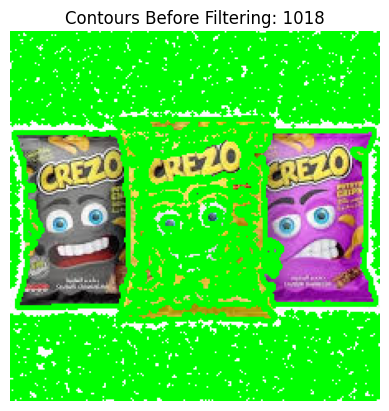

In [121]:
contours_before, _ = cv2.findContours(
    binary_before,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

contour_img_before = img.copy()
cv2.drawContours(contour_img_before, contours_before, -1, (0,255,0), 2)

plt.imshow(contour_img_before)
plt.title(f"Contours Before Filtering: {len(contours_before)}")
plt.axis("off")
plt.show()

areas_before = [cv2.contourArea(c) for c in contours_before]
mean_area_before = np.mean(areas_before) if areas_before else 0

In [125]:
areas = []

for cnt in contours_before:
    area = cv2.contourArea(cnt)
    areas.append(area)
mean_area = sum(areas) / len(areas) if areas else 0
print("Mean object area:", mean_area)

Mean object area: 19.173379174852652


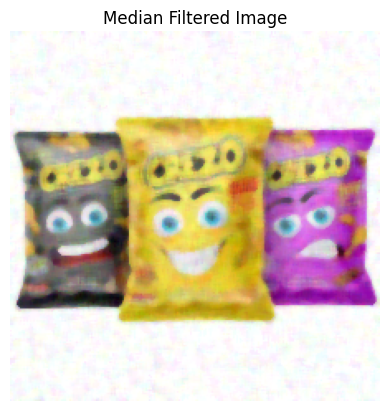

In [126]:
median_filtered = cv2.medianBlur(gaussian_img, 5)

plt.imshow(median_filtered)
plt.title("Median Filtered Image")
plt.axis("off")
plt.show()

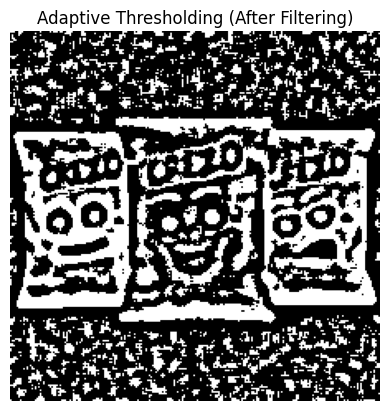

In [127]:
gray_median = cv2.cvtColor(median_filtered, cv2.COLOR_RGB2GRAY)

binary_after = cv2.adaptiveThreshold(
    gray_median,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)

plt.imshow(binary_after, cmap='gray')
plt.title("Adaptive Thresholding (After Filtering)")
plt.axis("off")
plt.show()


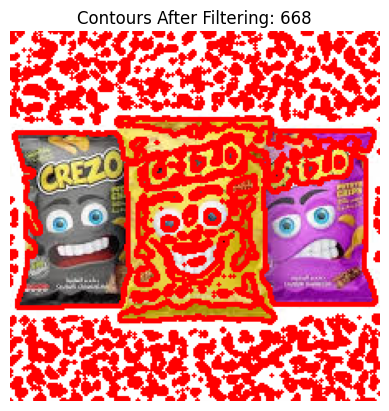

In [128]:
contours_after, _ = cv2.findContours(
    binary_after,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

contour_img_after = img.copy()
cv2.drawContours(contour_img_after, contours_after, -1, (255,0,0), 2)

plt.imshow(contour_img_after)
plt.title(f"Contours After Filtering: {len(contours_after)}")
plt.axis("off")
plt.show()

areas_after = [cv2.contourArea(c) for c in contours_after]
mean_area_after = np.mean(areas_after) if areas_after else 0


In [130]:
# Difference in number of contours
contour_difference = len(contours_after) - len(contours_before)

# Change in average contour area
area_change = mean_area_after - mean_area_before

# Percentage improvement in detection accuracy
# (Assuming median-filtered result is closer to ground truth)
accuracy_improvement = (
    abs(len(contours_before) - len(contours_after)) / len(contours_before)
) * 100 if len(contours_before) != 0 else 0


In [131]:

print("Number of contours before filtering :", len(contours_before))
print("Number of contours after filtering  :", len(contours_after))
print("Difference in contours              :", contour_difference)

print("\nMean contour area before filtering :", mean_area_before)
print("Mean contour area after filtering  :", mean_area_after)
print("Change in mean area                :", area_change)

print("\nPercentage improvement in detection accuracy : {:.2f}%".format(accuracy_improvement))


Number of contours before filtering : 1018
Number of contours after filtering  : 668
Difference in contours              : -350

Mean contour area before filtering : 19.173379174852652
Mean contour area after filtering  : 26.093562874251496
Change in mean area                : 6.920183699398844

Percentage improvement in detection accuracy : 34.38%


<hr>

# 9. Detect all rectangular objects in "boxes.png". For each bounding rectangle, compute the angle of orientation using minAreaRect(). Create a list showing:

* box ID

* angle

* area

* Then analyse:

* Are most boxes aligned?

* Any rotated boxes indicating misplacement?

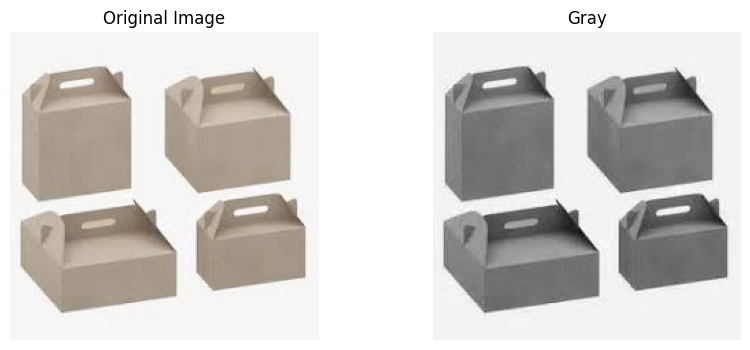

In [132]:
img = cv2.imread("boxes.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("Off")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(gray,cmap = 'gray')
plt.axis("off")
plt.title("Gray")

plt.show()

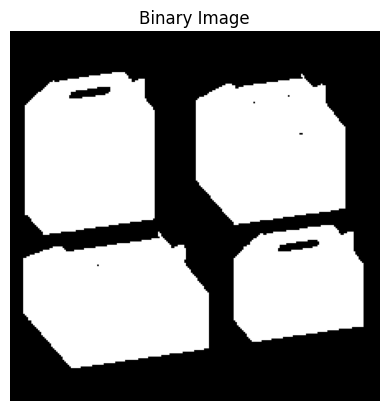

In [133]:
# Binary threshold
_, binary = cv2.threshold(
    gray, 200, 255,
    cv2.THRESH_BINARY_INV
)

plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

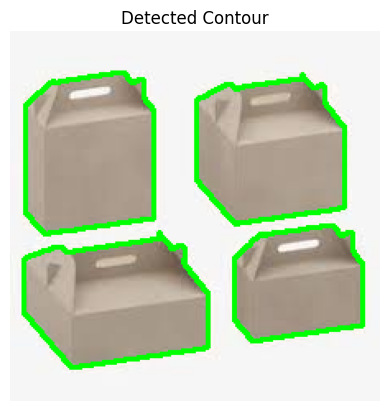

In [134]:
contours, _ = cv2.findContours(
    binary,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)
img_contour= img.copy()
cv2.drawContours(img_contour, contours, -1, (0,255,0), 2)
plt.imshow(img_contour)
plt.title("Detected Contour")
plt.axis("off")
plt.show()

In [135]:
results = []  # stores box_id, angle, area

output = img.copy()
box_id = 1

for cnt in contours:
    area = cv2.contourArea(cnt)
    
    # Ignore very small objects (noise)
    if area < 500:
        continue
    
    rect = cv2.minAreaRect(cnt)
    (cx, cy), (w, h), angle = rect
    
    # Normalize angle 
    if w < h:
        angle = angle + 90
    
    # Box points
    box = cv2.boxPoints(rect) # Converts the rectangle into 4 corner points
    box = box.astype(int) # convert into integer
    
    # Draw rectangle
    cv2.drawContours(output, [box], 0, (0,255,0), 2)
    
    results.append({
        "Box ID": box_id,
        "Angle (deg)": round(angle, 2),
        "Area": round(area, 2)
    })
    
    box_id += 1


In [136]:
plt.figure(figsize=(6,6))
plt.imshow(output)
plt.title("Detected Rectangular Boxes")
plt.axis("off")
plt.show()

In [137]:
import pandas as pd

df = pd.DataFrame(results)
df

Box ID  Angle (deg)    Area
0       1       172.00  6967.5
1       2       172.15  4603.5
2       3       172.57  6710.5
3       4        90.00  6772.0

<hr>

# 10. Perform Otsu’s thresholding on "fruits_segment.png", detect contours, and compute SSIM and PSNR between:

* original grayscale image
* binary mask scaled to 0–255

## Interpret:
* Is segmentation too harsh or reasonable?
* Do edges align well?

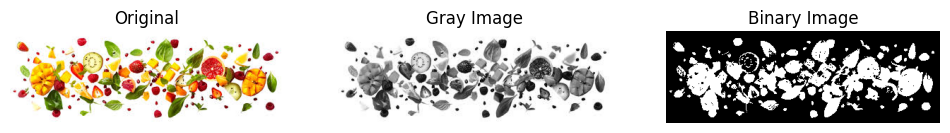

In [154]:
img = cv2.imread('fruits_segment2.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray, cmap='gray')
plt.title("Gray Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(binary_mask, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.show()


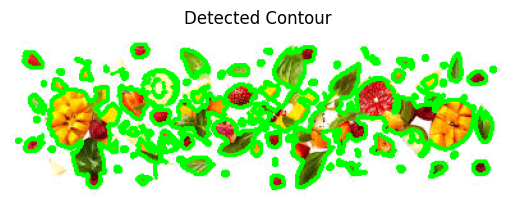

In [155]:

contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0,255,0), 2)
plt.imshow(contour_img)
plt.title("Detected Contour")
plt.axis("off")
plt.show()

In [156]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

ssim_value = ssim(gray, binary_mask)
psnr_value = psnr(gray, binary_mask)

print(f"Otsu's Threshold Value: {thresh:0.2f}")
print(f"SSIM between grayscale and binary mask: {ssim_value:.3f}")
print(f"PSNR between grayscale and binary mask: {psnr_value:.2f} dB")

Otsu's Threshold Value: 172.00
SSIM between grayscale and binary mask: -0.252
PSNR between grayscale and binary mask: 1.08 dB


# Only One Fruit

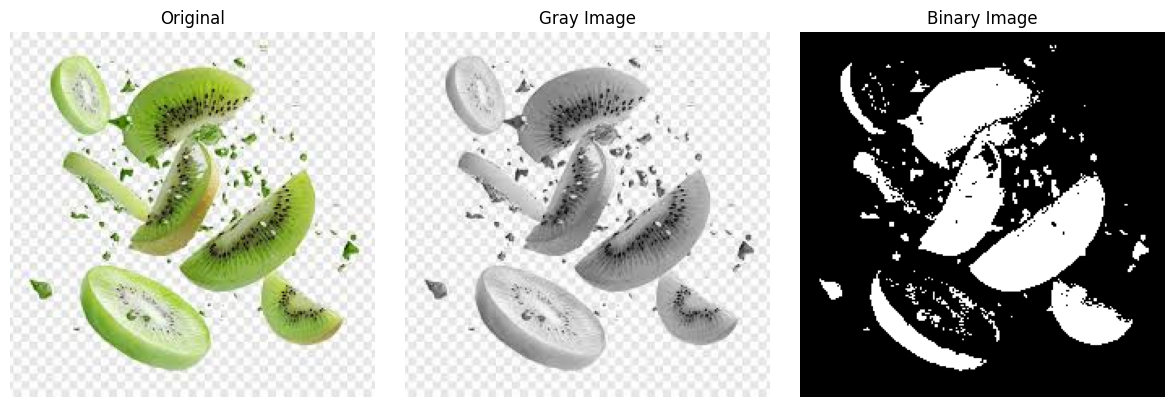

In [162]:

img_bgr = cv2.imread('fruits_segment.png')


gray_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

_, binary_mask = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Step 5: Plot all three images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Gray Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(binary_mask, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.tight_layout()
plt.show()

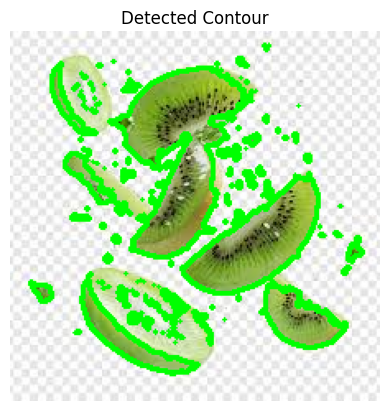

In [164]:

contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = img_rgb.copy()
cv2.drawContours(contour_img, contours, -1, (0,255,0), 2)
plt.imshow(contour_img)
plt.title("Detected Contour")
plt.axis("off")
plt.show()

In [167]:
gray_fixed = gray_img.astype(np.uint8)
binary_fixed = binary_mask.astype(np.uint8)

# Compute SSIM and PSNR
ssim_value = ssim(gray_fixed, binary_fixed, data_range=gray_fixed.max() - gray_fixed.min())
psnr_value = psnr(gray_fixed, binary_fixed, data_range=gray_fixed.max() - gray_fixed.min())

print(f"Otsu's Threshold Value: {thresh:0.2f}")
print(f"SSIM between grayscale and binary mask: {ssim_value:.3f}")
print(f"PSNR between grayscale and binary mask: {psnr_value:.2f} dB")

Otsu's Threshold Value: 172.00
SSIM between grayscale and binary mask: -0.071
PSNR between grayscale and binary mask: 1.29 dB


<hr>

# <center> Thank You </center>

<hr>